In [2]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib 
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score

from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer

import time
from operator import itemgetter



In [3]:
path = 'credit.data'
data = pd.read_csv(path, delimiter='	',header=None, na_values='?')
##data = pd.DataFrame(data)
data = data.dropna(axis=0, how='any')
cible = data[15]##.values.reshape(-1,1)
###cible  = pd.DataFrame(data=cible)
cible = cible.replace(to_replace='+', value=1)
cible = cible.replace(to_replace='-', value=0)
data = data.drop(15, axis=1)
sous_ensemble = data[[1,2,7,13,14]]
sous_ensemble = sous_ensemble.astype(float)



path = 'credit.data'
data = pd.read_csv(path, delimiter='	',header=None, na_values='?')
data_num = data[[1,2,7,13,14]]
data_cat = data[[3,4,5,6,8,9,10,11,12]]
data_cat = data_cat.astype(str)
cible_final = data[15]
cible_final = cible_final.replace(to_replace='+', value=1)
cible_final = cible_final.replace(to_replace='-', value=0)




gnb = GaussianNB()


X_train, X_test, y_train, y_test = train_test_split(sous_ensemble, 
                                                    cible, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [4]:
sous_ensemble.shape

(653, 5)

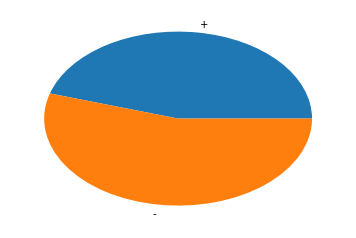

In [5]:

labels = ['+', '-']
plt.pie([sum(cible), (len(cible)- sum(cible))], labels=labels)
plt.show()

On affiche ici la proportion de + et de - dans nos données

# ROC

In [5]:
def TP(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] > theta and x == 1:
            count += 1
        i += 1
    return count


def FP(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] >= theta and x == 0:
            count += 1
        i += 1
    return count


def TN(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] < theta and x == 0:
            count += 1
        i += 1
    return count


def FN(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] < theta and x == 1:
            count += 1
        i += 1
    return count


class ROC_curves:
    def __init__(self,
                 pred=sous_ensemble,
                 res=cible,
                 gran = 101):
        x = []
        y = []
        for j in range(0,gran):
            tn = TN(j/(gran-1),pred,res)
            neg = tn + FP(j/(gran-1),pred,res)
            tp = TP(j/(gran-1),pred,res)
            pos = tp + FN(j/(gran-1),pred,res)

            if neg == 0:
                x.append(0)
            else:
                x.append(tn / neg)
            if pos == 0:
                y.append(0)
            else:
                y.append(tp / pos)
      
        self.rocx = x
        self.rocy = y
    def plot_it(self):
        plt.plot(self.rocx,self.rocy)
        plt.show()

# Qualité

In [6]:
class Qualite:
    def __init__(self, 
                   _modele=gnb, 
                   _data=sous_ensemble, 
                   _y=cible, 
                   _y_pred=cible,
                   _y_pred_proba=cible,
                   _cv=10,
                   _print_mode=True):
        
        self.accuracy = sklearn.metrics.accuracy_score(_y, _y_pred)
        self.AUC = sklearn.metrics.roc_auc_score(_y, _y_pred)
        self.cross_validation = cross_val_score(_modele, _data, y=_y, cv=_cv)
        self.moyenne = np.mean(self.cross_validation)
        self.ecart_type = np.std(self.cross_validation)
        self.precision = average_precision_score(_y, _y_pred)
        
        self.roc = ROC_curves(pred=_y_pred_proba, res=_y)
        
        
        if _print_mode:
            self.roc.plot_it()

# Apprentissage

In [7]:
def algo_apprentissage(mod=GaussianNB(),
                           data=sous_ensemble,
                           target=cible,
                           print_mode=True,
                           cv=10):
    X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=42)
    result = dict()
    mod_fit = mod.fit(X_train, y_train)
    y_prediction_proba = mod_fit.predict_proba(X_test)
    y_prediction = mod_fit.predict(X_test)
    q_mod = Qualite(_modele=mod,
                 _data=X_test,
                 _y=y_test,
                 _y_pred=y_prediction,
                 _y_pred_proba=y_prediction_proba,
                 _print_mode=print_mode,
                 _cv=cv)
    
    result['y_prediction_proba'] = y_prediction_proba
    result['y_prediction'] = y_prediction
    result['q_mod'] = q_mod
    
    if print_mode:
        print('La précision est ' + str(q_mod.accuracy))
        print('')
        print('L\'AUC est ' + str(q_mod.AUC))
        print('')
        print('Le score moyen par ' + str(cv) + ' cross-validation est ' + str(q_mod.moyenne))
    
    return result

# NaiveBayesSimple

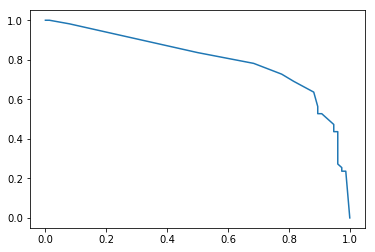

La précision est 0.740458015267

L'AUC est 0.700956937799

Le score moyen par 10 cross-validation est 0.745879120879


In [8]:
GNB = GaussianNB()
gnb = algo_apprentissage(GNB)

# Arbre CART

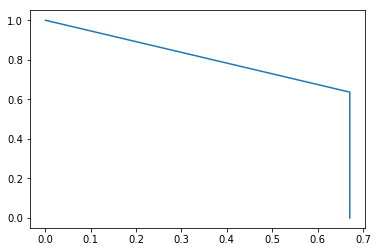

La précision est 0.656488549618

L'AUC est 0.653708133971

Le score moyen par 10 cross-validation est 0.811446886447


In [9]:
DTC = tree.DecisionTreeClassifier()
dtc = algo_apprentissage(DTC)

# Arbre ID3

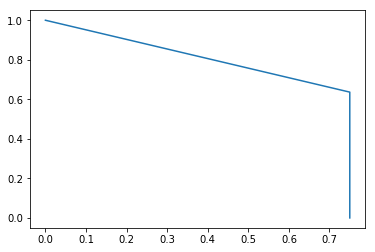

La précision est 0.702290076336

L'AUC est 0.693181818182

Le score moyen par 10 cross-validation est 0.754304029304


In [10]:
id3 = tree.DecisionTreeClassifier(criterion="entropy")
essai = algo_apprentissage(id3)

# Decision Stump

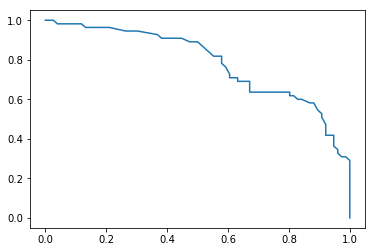

La précision est 0.732824427481

L'AUC est 0.716985645933

Le score moyen par 10 cross-validation est 0.767307692308


In [11]:
decision_stump = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=1.0,
                                 max_depth=1,
                                 random_state=0)

ds = algo_apprentissage(decision_stump)

# MLP

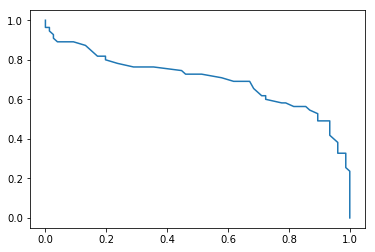

La précision est 0.709923664122

L'AUC est 0.68971291866

Le score moyen par 10 cross-validation est 0.705494505495


In [12]:
MLP = MLPClassifier(solver='lbfgs',
                    alpha=1,
                    hidden_layer_sizes=(20, 10))

mlp = algo_apprentissage(MLP)

# KNN

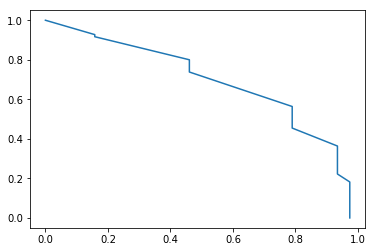

La précision est 0.69465648855

L'AUC est 0.676555023923

Le score moyen par 10 cross-validation est 0.770512820513


In [13]:
KNN = KNeighborsClassifier()
knn = algo_apprentissage(KNN)

# Bagging 

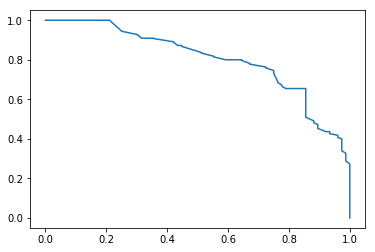

La précision est 0.732824427481

L'AUC est 0.722009569378

Le score moyen par 10 cross-validation est 0.79652014652


In [14]:
BC = BaggingClassifier(n_estimators=50)
bc = algo_apprentissage(BC)

# Adaboost

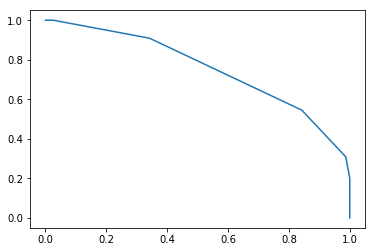

La précision est 0.717557251908

L'AUC est 0.693779904306

Le score moyen par 10 cross-validation est 0.697802197802


In [15]:
ABC = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1.0,
                         algorithm='SAMME.R',
                         random_state=None)
abc = algo_apprentissage(ABC)

# RandomForest

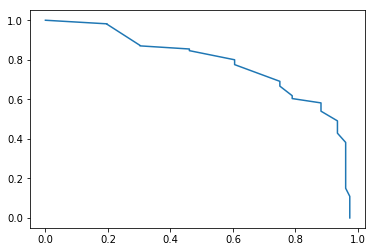

La précision est 0.717557251908

L'AUC est 0.703827751196

Le score moyen par 10 cross-validation est 0.77152014652


In [16]:
RFC = RandomForestClassifier(n_estimators=10,
                             criterion='gini',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features='auto',
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             min_impurity_split=None,
                             bootstrap=True,
                             oob_score=False,
                             n_jobs=1,
                             random_state=None,
                             verbose=0,
                             warm_start=False,
                             class_weight=None)

rfc = algo_apprentissage(RFC)

On met en place les algorithmes proposés dans le sujet de TP

On affiche la courbe ROC de performance des différents algorithmes

Les résultats sont plutôt bons.

PCA_Transformation

In [17]:
def pca_transform(data=sous_ensemble,
        target=cible,
        variance=0.7,
        print_mode=True,
        normalized=True,
        min_max_ed=False):
    if normalized:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)
    elif min_max_ed:
        scaler = MinMaxScaler()
        data = scaler.fit_transform(data)
        
        
    for x in range(len(data[0])):
        pca = PCA(n_components=x)
        pca.fit(data)
        if sum(pca.explained_variance_ratio_) > variance:## and x >1:
            if print_mode:
                print('Hello World')
            break
    X_pca = pca.fit_transform(data)
    if print_mode:
        plt.scatter(X_pca[:, 0], X_pca[:, 1])
        plt.show()
        plt.close()
    return [pca,X_pca]
        
        
pca_data = pca_transform(normalized=True, print_mode=False)[1]



In [18]:
colnames = ['Accuracy', 'AUC', 'Moyenne CV', 'Precision', 'Std CV', 'Temps']
algos = [KNN, DTC, id3, BC, RFC, ABC, MLP, GNB]
indexs = ['KNN', 'DTC', 'id3', 'BC', 'RFC', 'ABC', 'MLP', 'GNB']
clfs = dict()
for x in range(len(algos)):
    clfs[indexs[x]] = algos[x]
    
    
    
def final_table(mode=None,
                data=sous_ensemble,
                col=colnames,
                algos=algos,
                indexs=indexs):
    if mode is None:
        pass
    elif mode == 'normalized':
        scaler = StandardScaler()
        scaler.fit(data)
        data = scaler.transform(data)
    elif mode == 'min_max_ed':
        scaler = MinMaxScaler()
        scaler.fit(data)
        data = scaler.transform(data)
    elif mode == 'pca':
        data = pca_transform(data=data,
                                 normalized=True,
                                 print_mode=False)[1]


    result = []
    for alg in algos:
        t1 = time.time()
        res_algo = algo_apprentissage(alg, data=data, target=cible,print_mode=False)
        t2 = time.time()
        delta_t = t2 - t1
        ajout = [res_algo['q_mod'].accuracy, res_algo['q_mod'].AUC, res_algo['q_mod'].moyenne, res_algo['q_mod'].precision, res_algo['q_mod'].ecart_type, delta_t]
        result.append(ajout)

    result = pd.DataFrame(result, columns=colnames, index=indexs)
    return result

modes = [None, 'normalized', 'min_max_ed', 'pca']

tables = dict()
for mode in modes:
    event = dict()
    tables[str(mode)] = final_table(mode=mode)

Ainsi dans table nous avons les résultats des algos en fonction de la méthode de 
preprocessing untilisée.

In [19]:
tables['None']


,Accuracy,AUC,Moyenne CV,Precision,Std CV,Temps
KNN,0.694656,0.676555,0.770513,0.554966,0.125371,0.062193
DTC,0.648855,0.642105,0.787637,0.515307,0.048599,0.053979
id3,0.717557,0.701316,0.725733,0.580439,0.120412,0.053307
BC,0.732824,0.716986,0.803663,0.598184,0.089170,0.736237
RFC,0.725191,0.695335,0.772711,0.591365,0.124166,0.177413
ABC,0.717557,0.693780,0.697802,0.580450,0.082327,0.724531
MLP,0.763359,0.733254,0.719231,0.645385,0.120684,0.722745
GNB,0.740458,0.700957,0.745879,0.620857,0.138022,0.050237


In [20]:
tables['min_max_ed']

,Accuracy,AUC,Moyenne CV,Precision,Std CV,Temps
KNN,0.717557,0.706340,0.759615,0.580993,0.155069,0.053098
DTC,0.679389,0.675957,0.766209,0.544422,0.059294,0.055091
id3,0.694656,0.676555,0.770971,0.554966,0.119853,0.053327
BC,0.740458,0.723565,0.788187,0.607501,0.103533,0.773447
RFC,0.763359,0.743301,0.803114,0.637991,0.105849,0.194503
ABC,0.717557,0.693780,0.697802,0.580450,0.082327,0.751783
MLP,0.770992,0.744856,0.717949,0.652962,0.107523,0.832745
GNB,0.740458,0.700957,0.753022,0.620857,0.138050,0.045181


In [21]:
tables['normalized']

,Accuracy,AUC,Moyenne CV,Precision,Std CV,Temps
KNN,0.702290,0.683134,0.766850,0.563048,0.118478,0.053846
DTC,0.679389,0.675957,0.788187,0.544422,0.065025,0.051971
id3,0.679389,0.663397,0.755495,0.539792,0.128079,0.054483
BC,0.778626,0.763995,0.811996,0.655965,0.110145,0.740791
RFC,0.793893,0.767105,0.786996,0.688992,0.097274,0.184696
ABC,0.717557,0.693780,0.697802,0.580450,0.082327,0.740292
MLP,0.755725,0.744258,0.798352,0.625462,0.131312,0.817524
GNB,0.740458,0.700957,0.753022,0.620857,0.138050,0.046978


In [22]:
tables['pca']

,Accuracy,AUC,Moyenne CV,Precision,Std CV,Temps
KNN,0.679389,0.665909,0.691209,0.540635,0.124843,0.054819
DTC,0.610687,0.584091,0.676374,0.473279,0.154395,0.081943
id3,0.595420,0.575957,0.672253,0.465750,0.095190,0.071735
BC,0.648855,0.619498,0.700824,0.505173,0.146638,0.787126
RFC,0.610687,0.584091,0.712637,0.473279,0.104268,0.223817
ABC,0.610687,0.579067,0.676374,0.470547,0.160250,0.835750
MLP,0.648855,0.639593,0.697161,0.514085,0.088096,0.849016
GNB,0.732824,0.694378,0.703022,0.607796,0.112665,0.047173


In [23]:
def run_classifiers(classifiers=clfs,
                    X=sous_ensemble,
                    Y=cible,
                    print_mode=True,
                    n_splits=10,
                    mode=None):
    
    if mode is None:
        pass
    elif mode == 'normalized':
        scaler = StandardScaler()
        scaler.fit(X)
        X = scaler.transform(X)
    elif mode == 'min_max_ed':
        scaler = MinMaxScaler()
        scaler.fit(X)
        X == scaler.transform(X)
    elif mode == 'pca':
        X = pca_transform(data=X,
                          normalized=True,
                          print_mode=False)[1]

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0) 

    result = []
    
    for i in classifiers:
        clf = classifiers[i]
        cv_acc = cross_val_score(clf, X, Y, cv=kf)
        if print_mode:
            print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        result.append([i,np.mean(cv_acc)])
    
    result = sorted(result, key=itemgetter(1), reverse=True)
    return result


rc = run_classifiers(mode='min_max_ed', print_mode=True)

Accuracy for KNN is: 0.683 +/- 0.053
Accuracy for DTC is: 0.671 +/- 0.042
Accuracy for id3 is: 0.672 +/- 0.053
Accuracy for BC is: 0.720 +/- 0.063
Accuracy for RFC is: 0.723 +/- 0.055
Accuracy for ABC is: 0.711 +/- 0.047
Accuracy for MLP is: 0.698 +/- 0.062
Accuracy for GNB is: 0.652 +/- 0.035


In [24]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(sous_ensemble, cible)
importances = forest.feature_importances_

In [25]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train).predict(X_test)


array([ 0.6,  0.7,  1. ,  0.5,  0.3,  0.3,  0.4,  0.9,  0.5,  0.1,  0.7,
        0. ,  0. ,  0.2,  0.3,  0.2,  0.5,  0.3,  0.8,  0.2,  0.7,  0.8,
        0.5,  0.4,  0.7,  0.8,  0.3,  0. ,  0.3,  0.4,  1. ,  0.6,  0.7,
        1. ,  0. ,  0.4,  1. ,  0. ,  0.1,  0.4,  0.2,  0.3,  0.1,  0.1,
        0.6,  0.7,  0.1,  0.2,  0.1,  1. ,  0.5,  0.2,  0.6,  0. ,  0.1,
        0.6,  0.8,  0.3,  0. ,  1. ,  0.2,  0.2,  0.4,  0.9,  0.8,  0.5,
        0. ,  0.2,  0.2,  0.6,  0.2,  0.3,  0.9,  0.2,  0. ,  0.6,  0.5,
        0.9,  0.9,  0.1,  1. ,  0.5,  0. ,  0.1,  0.2,  0.6,  0.4,  0.9,
        0. ,  0.4,  0.1,  0.2,  0.6,  0.3,  1. ,  0.2,  0.4,  0. ,  0. ,
        0.3,  0.4,  0. ,  0.1,  0.1,  0.2,  1. ,  0. ,  1. ,  0. ,  0. ,
        1. ,  1. ,  0.4,  1. ,  0.5,  0.4,  0.5,  0. ,  0.2,  0.4,  1. ,
        0.5,  0.1,  0.2,  0.2,  0.6,  0.2,  0. ,  0.2,  0.1,  0.3])

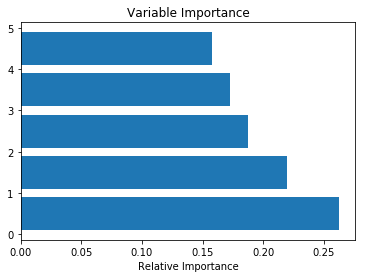

In [26]:
clf = RandomForestClassifier()

clf.fit(sous_ensemble, cible) 

importances=clf.feature_importances_ 
sorted_idx = np.argsort(importances)[::-1]

features =np.arange(1, sous_ensemble.shape[1])

padding = np.arange(sous_ensemble.size/len(sous_ensemble)) + 0.5 
plt.barh(padding, importances[sorted_idx], align='center') 
#plt.yticks(padding, features[sorted_idx]) 
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

In [27]:

sous_ensemble.shape


(653, 5)

Preprocessing cat

In [28]:
X_cat = np.copy(data_cat) 
for col_id in range(len(X_cat[0])):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True) 
    X_cat[:, col_id] = val_idx

imp_cat = Imputer(missing_values=np.nan, strategy='most_frequent') 
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])


encodeur = OneHotEncoder()
encodeur.fit(X_cat)
X_cat = encodeur.transform(X_cat).toarray()

In [29]:
X_num = np.copy(data_num) 
imp_num = Imputer(missing_values=np.nan, strategy='mean')
imp_num = Imputer(missing_values=0, strategy='mean')
X_num = imp_num.fit_transform(X_num)

In [39]:
cleaned_data = pd.DataFrame(np.concatenate((X_cat, X_num), axis=1))

In [40]:
rc = run_classifiers(X=cleaned_data, Y=cible_final, classifiers=clfs, print_mode=True, mode='min_max_ed')


for clf in clfs:
    algo_apprentissage(clfs[clf], data=cleaned_data, target=cible_final, print_mode=False)

Accuracy for KNN is: 0.727 +/- 0.047
Accuracy for DTC is: 0.807 +/- 0.042
Accuracy for id3 is: 0.820 +/- 0.050
Accuracy for BC is: 0.853 +/- 0.043
Accuracy for RFC is: 0.858 +/- 0.043
Accuracy for ABC is: 0.840 +/- 0.049
Accuracy for MLP is: 0.721 +/- 0.106
Accuracy for GNB is: 0.826 +/- 0.040


In [42]:
table_finale = dict()
modes = [None, 'normalized', 'min_max_ed', 'pca']
for mode in modes:
    table_finale[mode] = pd.DataFrame(run_classifiers(X=cleaned_data, Y=cible_final, classifiers=clfs, print_mode=False, mode=mode), columns=['algo', 'accuracy'] )

In [43]:
table_finale[None]

,algo,accuracy
0,RFC,0.847357
1,BC,0.844416
2,ABC,0.840153
3,GNB,0.825618
4,DTC,0.810955
5,id3,0.808078
6,MLP,0.735614
7,KNN,0.726876


In [44]:
table_finale['min_max_ed']

,algo,accuracy
0,RFC,0.861935
1,BC,0.851662
2,ABC,0.840153
3,GNB,0.825618
4,id3,0.812404
5,DTC,0.799361
6,MLP,0.737020
7,KNN,0.726876
